<a href="https://colab.research.google.com/github/wheemin-2/25-1-ESAA/blob/main/0307_HW_Model_Training2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **규제가 있는 선형 모델**

## **릿지 회귀**

규제항 $\alpha \sum_{i=1}^{n} \theta_i^2$ 이 비용함수에 추가된 선형 회귀

전체 비용 함수 : $J(\theta) = \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 + \alpha \sum_{i=1}^{n} \theta_i^2 = MSE(\theta) + \alpha \sum_{i=1}^{n} \theta_i^2$


* 학습 알고리즘을 데이터에 맞춤 + 모델의 가중치가 가능한 한 작게 유지되도록 함
* 규제항은 훈련하는 동안에만 비용 함수에 추가됨
    * 즉, 모델의 성능은 규제가 없는 성능 지표로 평가한다는 뜻

하이퍼 파라미터
* $\alpha$ : 모델을 얼마나 많이 규제할지를 조절
    * $\alpha = 0 $이면 선형 회귀와 같아짐
    * $\alpha$가 아주 클 경우 모든 가중치가 거의 0에 가까워짐 > 결국 데이터의 평균을 지나는 수평선이 됨
    

다양한 수준의 릿지 규제를 사용한 선형 회귀와 다항 회귀

![Ridge](https://blog.kakaocdn.net/dn/bji7kP/btq92xgDcB7/lz58hQu4AoBIGqdhNxmS31/img.png)

* 다항 회귀에서 alpha를 증가시킬수록 직선에 가까워짐
    * 즉, 모델의 분산은 줄어들지만 편향은 커짐

In [1]:
import numpy as np
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [3]:
# 정규방정식을 사용한 릿지 회귀 적용
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')   # Cholesky가 발견한 행렬 분해를 사용하여 해를 도출
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([4.5151629])

In [4]:
# 확률적 경사하강법 사용
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty='l2')  # SGD 비용함수에 l2 규제 추가 = 릿지 회귀
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.48748498])

## **라쏘 회귀**

선형 회귀의 또 다른 규제된 버전

* 릿지 회귀 : 비용 함수에 규제항을 더하지만 $l_2 norm$의 제곱을 2로 나눔
* 라쏘 회귀 : 가중치 벡터의 $l_1 norm$을 사용


**라쏘 회귀의 비용함수**

$J(\theta) = \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 + \alpha \sum_{i=1}^{n} |\theta_i| = MSE(\theta) + \alpha \sum_{i=1}^{n} |\theta_i|$



다양한 수준의 라쏘 규제를 사용한 선형 회귀와 다항 회귀

![Lasso](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FBgsNN%2FbtqE9Kk7FZN%2FukZ3UgRDhK8gq83doNu8d1%2Fimg.jpg)

**라쏘 회귀의 특징**

* 덜 중요한 특성의 가중치를 제거하려고 함 (가중치=0)
    * 즉, 자동으로 특성 선택을 하고 희소 모델(sparse model)을 만듦 (0이 아닌 특성의 가중치가 적음)
    

In [5]:
# 사이킷런 패키지로 Lasso 구현
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.46115632])

In [6]:
# SGDRegressor를 통해 Lasso 표현
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X,y)
sgd_reg.predict([[1.5]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4.47685178])

## **엘라스틱넷**

릿지 회귀와 라쏘 회귀를 절충한 모델

* 규제항은 릿지와 라쏘의 규제항을 단순히 더해서 사용함
* 혼합 정도는 혼합 비율 r을 사용하여 조절함
    * r=0 : 릿지 회귀와 동일
    * r=1 : 라쏘 회귀와 동일

![elasticNet](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FQKeJF%2FbtqE9Kk78Ob%2FVttpG4CU4cgrgz2ICj5jq1%2Fimg.jpg)

*언제, 어떤 모델을 사용해야할까?*

* 대부분의 경우 규제가 약간 있는 것이 좋음 : 일반 선형회귀는 피하는 것이 좋다
* 릿지가 기본
    * but 쓰이는 특성이 몇 개뿐이라고 의심되는 경우 라쏘나 엘라스틱넷이 나음
    * 불필요한 특성의 가중치를 0으로 만들어주기 때문
* 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때에는 라쏘보다 엘라스틱넷 선호!


In [7]:
# 엘라스틱넷 사용
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.46774304])

## **조기 종료**

In [9]:
# 조기 종료 구현
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import clone

# 데이터 준비
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None; best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

# **로지스틱 회귀**

샘플이 특정 클래스에 속할 "확률"을 추정하는 데에 사용

## **확률 추정**

로지스틱 회귀는 로지스틱 함수(시그모이드 함수)를 사용하여 확률 값을 추정하며, 출력 결과 값은 0과 1사이의 값을 갖는다

* 로지스틱 회귀 모델의 확률 추정 (벡터 표현식)

 ![logit1](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FmqLnz%2FbtqFaC7X4qN%2FLrCH16r1RiLaT5BKsmPCy1%2Fimg.jpg)

* 로지스틱 함수 (=시그모이드 함수)
![sigmoid](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcHbxfI%2FbtqFaCUrZaW%2FkLxR1h3JCvuKxetDDhKSxK%2Fimg.jpg)

## **훈련과 비용함수**

로지스틱 회귀 모델의 훈련 목적
* y = 1에 대해서는 높은 확률을 추정하고, y = 0에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 $\theta$를 찾는 것


* 하나의 훈련 샘플에 대한 비용 함수

 ![cost ft1](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FliJfZ%2FbtqFaUUE9En%2Fqp0pDKtkKoBaX0ZePHhyGk%2Fimg.jpg)

* 전체 훈련 세트에 대한 비용 함수

 => 모든 훈련 샘플의 비용의 평균, "로그 손실"

 ![log loss](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbJNiDO%2FbtqFctuO3Tm%2Fr1Q5L61C6Z5OvFdBRrN8Kk%2Fimg.jpg)

 *위 비용 함수는 볼록 함수이므로, 경사 하강법과 같은 알고리즘을 통해 전역 최솟값(global minimum)을 찾을 수 있다.

## **결정 경계**

In [11]:
# 붓꽃데이터 로드
from sklearn import datasets

iris = datasets.load_iris()

X = iris['data'][:,3:] # 꽃잎의 너비
y = (iris['target']==2).astype(int)  # Iris-Virginica면 1, else 0

In [12]:
# 모델 훈련
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

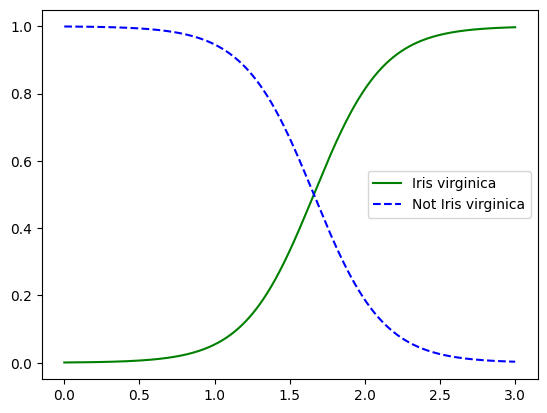

In [14]:
import matplotlib.pyplot as plt

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],'g-',label='Iris virginica')
plt.plot(X_new, y_proba[:,0],'b--',label='Not Iris virginica')
plt.legend()

In [15]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## **소프트맥스 회귀**

Target 변수가 2개 이상인 경우 사용하는 모델

**작동 원리**
* 샘플 x가 주어지면 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수를 계산
* 그 점수에 정규화된 지수 함수(소프트맥스 함수)를 적용하여 각 클래스의 확률을 추정

* 클래스 k에 대한 소프트맥스 점수

 ![softmax score](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbhOTAD%2FbtqFaBVBr3R%2FK77PvSFTdNokCrafa3REu1%2Fimg.jpg)

* 소프트맥스 함수

 ![softmax ft](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbEn58H%2FbtqFct2GzF3%2FB3eqDsU2azJ2Gg1jY2xWlK%2Fimg.jpg)

로지스틱 회귀 분류기와 마찬가지로 소프트맥스 회귀 분류기는 추정 확률이 가장 높은 클래스를 선택
* 즉, 가장 높은 점수를 가진 클래스를 선택한다.

**목적**
* 모델이 타겟 클래스에 대해서는 높은 확률을 추정하도록 만드는 것
* 따라서 크로스 엔트로피 비용 함수를 최소화해서, 타겟 클래스에 대해 낮은 확률을 예측하는 모델을 억제시켜줘야 함
    * 크로스 엔트로피 : 추정된 클래스의 확률이 타겟 클래스에 얼마나 잘 맞는지를 측정하는 용도로 사용
    * ![cross entropy](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FEByPt%2FbtqFa6tPdJJ%2FkZSkPEtgpmK6oT8XnJCrKK%2Fimg.jpg)

소프트맥스 회귀 구현
* LogisticRegression 사용
* multi_class = 'multinomial' 설정
* solver = 'lbfgs' : 소프트맥스 회귀를 지원하는 알고리즘 지정

In [16]:
X = iris['data'][:, (2,3)] # 꽃잎 길이, 꽃잎 너비
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [18]:
print(softmax_reg.predict([[5,2]]))
print(softmax_reg.predict_proba([[5,2]]))

[2]
[[6.21626375e-07 5.73689803e-02 9.42630398e-01]]
